216
216
216
216


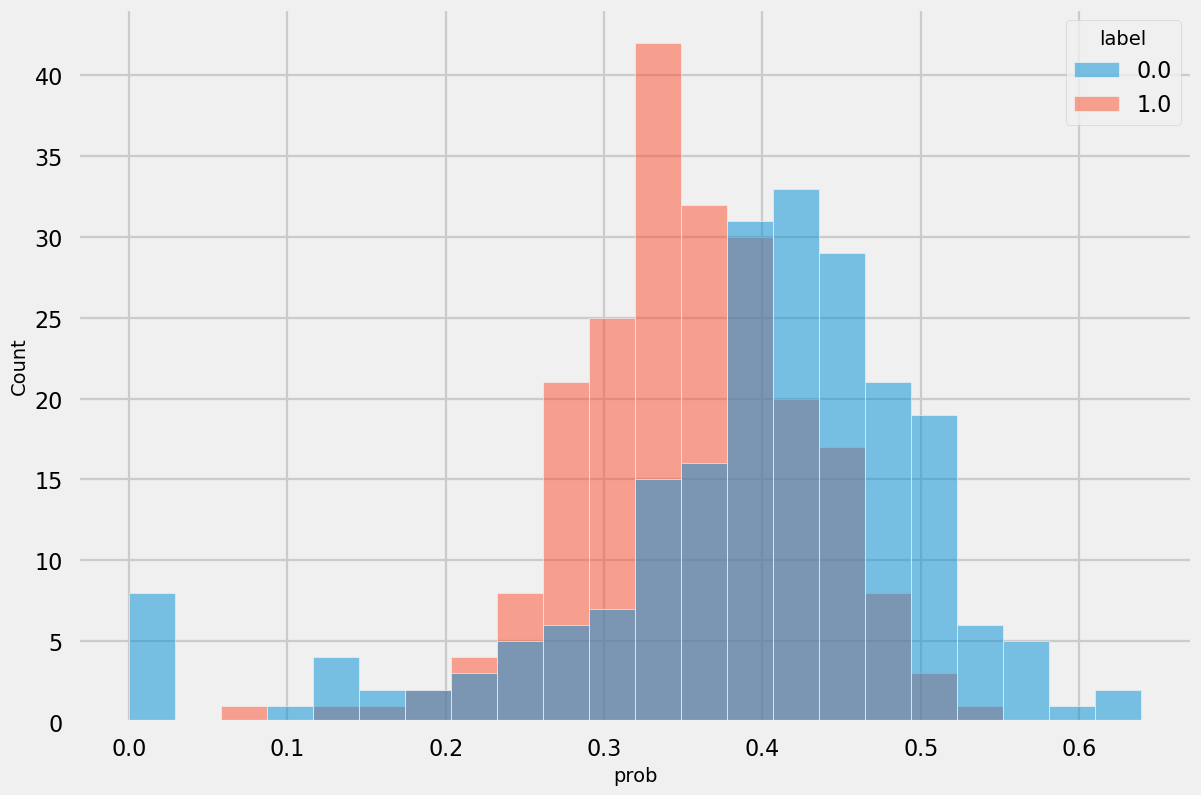

In [1]:
import json
def load_processed_code_from_file(input_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        return json.load(file)
    
def save_list_to_json(data, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        json.dump(data, file, indent=4)
import numpy as np
import pandas as pd


def split(data):
    M = len(data[-1])
    print(M)
    N = len(data) - M
    print(N)
    data_ori = []
    data_per = []
    for i in range(M):
        data_ori.append(data[i])
    for j in range(M):
        data_ = []
        for i in range(M, M+N):
                data_.append(data[i][j])
        data_per.append(data_)
    return data_ori, data_per

GPT_results = load_processed_code_from_file("GPT_result_24.json")
GPT_results_ori, GPT_results_per = split(GPT_results)
GPT_results_per = np.array(GPT_results_per)

human_results = load_processed_code_from_file("human_result_24.json")
human_results_ori, human_results_per = split(human_results)
human_results_per = np.array(human_results_per)

X_GPT = list(GPT_results_ori - GPT_results_per.mean(axis = 1))
X_human = list(human_results_ori - human_results_per.mean(axis = 1))

df = pd.DataFrame({
    "prob" : X_human + list(X_GPT),
    "label": list(np.zeros(len(X_human))) + list(np.ones(len(X_GPT)))
    })

import seaborn as sns


import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.style.use("seaborn-v0_8-poster")

sns.histplot(data = df, x = "prob", hue = "label")
plt.show()

In [2]:
from cProfile import label
from cmath import sqrt
from csv import field_size_limit
from os import closerange
import numpy as np
import pandas as pd
from pandas import DataFrame as DF
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pre
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
#导入plot_roc_curve,roc_curve和roc_auc_score模块
# from sklearn.metrics import plot_roc_curve,roc_curve,auc,roc_auc_score
from sklearn.metrics import mean_squared_error # 均方误差
from sklearn.metrics import mean_absolute_error # 平方绝对误差
from sklearn.metrics import r2_score

In [9]:
X1 = list(zip(human_results_ori,X_human))
X2 = list(zip(GPT_results_ori,X_GPT))
X = X1 + X2
X = np.array([list(x) for x in X])
y = list(np.zeros(len(X_human))) + list(np.ones(len(X_GPT)))


# 数据集切分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

#print(len(X_train))
#print((y_test))
#搭建多个不同核函数的SVM模型
#核函数为linear
lsvm = svm.SVC(kernel = 'linear')
lsvm.fit(X_train,y_train)
lyp = lsvm.predict(X_test)
print("Accuracy score of linear: ", lsvm.score(X_test, y_test))

#rbf
rsvm = svm.SVC(kernel = 'rbf')
rsvm.fit(X_train,y_train)
ryp = rsvm.predict(X_test)
print("Accuracy score of rbf: ", rsvm.score(X_test, y_test))

#confusion matrix
from sklearn.metrics import confusion_matrix
A = confusion_matrix(y_test,ryp)
precision = A[0][0]/(A[0][0] + A[1][0])
recall = A[0][0]/(A[0][0] + A[0][1])
print("rbf model Precision: ",precision)
print("rbf model Recall: ",recall)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Creating the Logistic Regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Logistic: \nAccuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy score of linear:  0.7701149425287356
Accuracy score of sigmoid:  0.27586206896551724
Accuracy score of rbf:  0.7701149425287356
rbf model Precision:  0.8222222222222222
rbf model Recall:  0.7551020408163265
Logistic: 
Accuracy: 0.7701149425287356
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.73      0.78        49
         1.0       0.70      0.82      0.76        38

    accuracy                           0.77        87
   macro avg       0.77      0.78      0.77        87
weighted avg       0.78      0.77      0.77        87



In [10]:
GPT_X = np.concatenate([np.array(GPT_results_ori).reshape(len(GPT_results_ori), -1), GPT_results_per], axis = 1)
human_X = np.concatenate([np.array(human_results_ori).reshape(len(human_results_ori), -1), human_results_per], axis = 1)
X = np.concatenate([GPT_X, human_X])
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

lsvm = svm.SVC(kernel = 'linear')
lsvm.fit(X_train,y_train)
lyp = lsvm.predict(X_test)
print("Accuracy score of linear: ", lsvm.score(X_test, y_test))

#rbf
rsvm = svm.SVC(kernel = 'rbf')
rsvm.fit(X_train,y_train)
ryp = rsvm.predict(X_test)
print("Accuracy score of rbf: ", rsvm.score(X_test, y_test))

Accuracy score of linear:  0.8160919540229885
Accuracy score of rbf:  0.8160919540229885


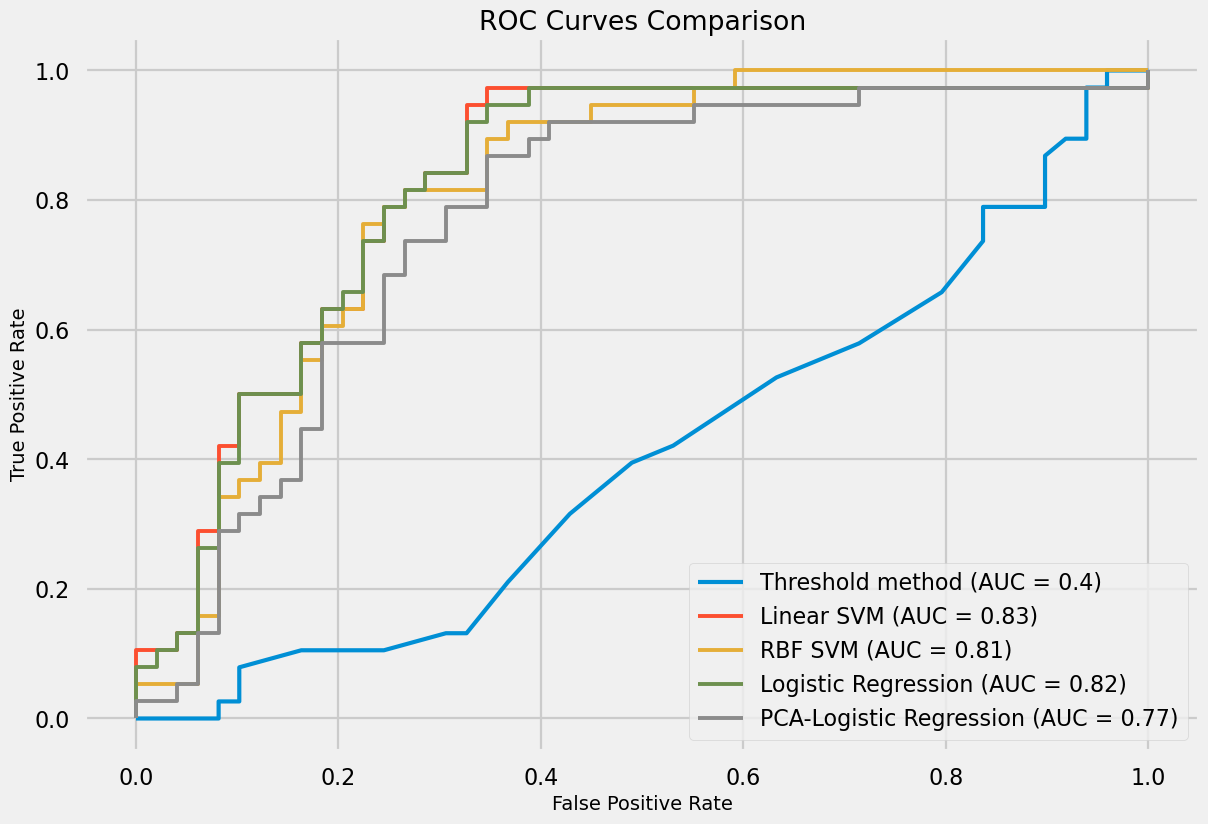

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Initialize models
lsvm = svm.SVC(kernel='linear', probability=True)
rsvm = svm.SVC(kernel='rbf', probability=True)
logistic_model = LogisticRegression()

# Train models
lsvm.fit(X_train, y_train)
rsvm.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

# For PCA-Logistic Model
pca = PCA(n_components=0.98)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca_logistic_model = LogisticRegression()
pca_logistic_model.fit(X_train_pca, y_train)

# Function to calculate ROC curve and AUC
def compute_roc_auc(model, X_test, y_test):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Calculate ROC curve and AUC for each model
fpr_lsvm, tpr_lsvm, roc_auc_lsvm = compute_roc_auc(lsvm, X_test, y_test)
fpr_rsvm, tpr_rsvm, roc_auc_rsvm = compute_roc_auc(rsvm, X_test, y_test)
fpr_logistic, tpr_logistic, roc_auc_logistic = compute_roc_auc(logistic_model, X_test, y_test)
fpr_pca_logistic, tpr_pca_logistic, roc_auc_pca_logistic = compute_roc_auc(pca_logistic_model, X_test_pca, y_test)

X_prob = list(X_human) + list(X_GPT)

def calculate_tpr_fpr(y_true, y_prob, threshold):
    y_pred = [1 if prob >= threshold else 0 for prob in y_prob]
    TP = sum(1 for true, pred in zip(y_true, y_pred) if true == pred == 1)
    FP = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 1)
    FN = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 0)
    TN = sum(1 for true, pred in zip(y_true, y_pred) if true == pred == 0)

    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
    return FPR, TPR

thresholds = np.linspace(0, 1, 100)
tpr_list = []
fpr_list = []
for m in thresholds:
    fpr, tpr = calculate_tpr_fpr(y_test, X_prob, m)
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Adding to the existing ROC plot
auc_threshold_model = np.round(np.trapz(tpr_list, fpr_list), 2)
plt.plot(fpr_list, tpr_list, label=f'Threshold method (AUC = {-auc_threshold_model})', lw=3)


# Show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')

# Plotting all ROC curves
plt.plot(fpr_lsvm, tpr_lsvm, label=f'Linear SVM (AUC = {roc_auc_lsvm:.2f})')
plt.plot(fpr_rsvm, tpr_rsvm, label=f'RBF SVM (AUC = {roc_auc_rsvm:.2f})')
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_pca_logistic, tpr_pca_logistic, label=f'PCA-Logistic Regression (AUC = {roc_auc_pca_logistic:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<Axes: xlabel='p_0', ylabel='p_k'>

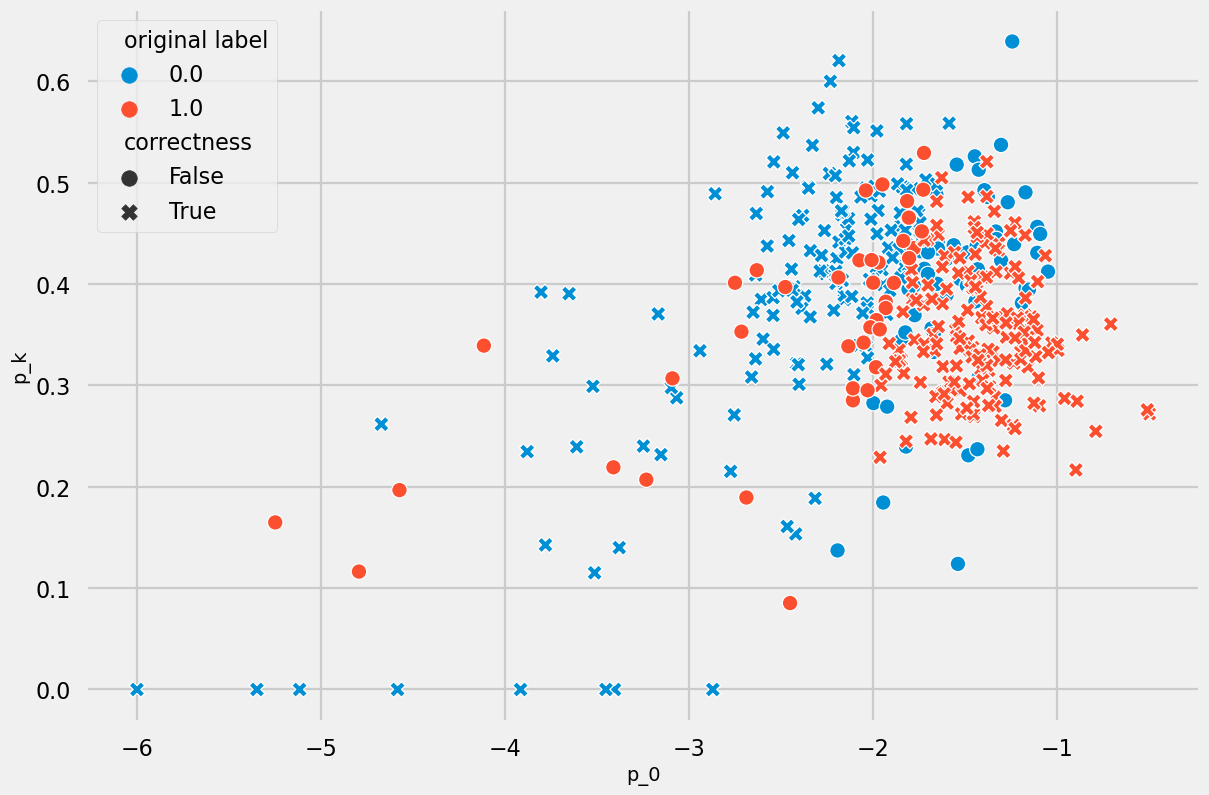

In [13]:
X1 = list(zip(human_results_ori,X_human))
X2 = list(zip(GPT_results_ori,X_GPT))
X = X1 + X2
X = np.array([list(x) for x in X])

y_pred = model.predict(X)
df = pd.DataFrame({
    "y_pred" : y_pred,
    "original label": y,
    "p_0" : np.clip(X[:, 0], -6, 100),
    "p_k" : X[:, 1],
    "correctness": y== y_pred
})
sns.scatterplot(data = df, y = "p_k", x = "p_0", style = "correctness", hue = "original label")